In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt

In [4]:
device_list = tf.test.gpu_device_name()
if device_list != '/device:GPU:0':
   raise SystemError('GPU device not found')
print("GPU found at : {}".format(device_list))

!nvidia-smi

GPU found at : /device:GPU:0
Sun Oct  2 18:06:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |    284MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                           

In [5]:
data_path = '/content/drive/MyDrive/animals/animals'
name_animals = '/content/drive/MyDrive/animals/name of the animals.txt'

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os 
import seaborn 
import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import random
import warnings 
warnings.filterwarnings('ignore')


In [7]:
image_size = (224, 224)
batch_size = 32

In [8]:
#training data
from pandas.io.formats.style_render import Subset

In [9]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset = 'training',
    validation_split = 0.2,
    image_size = image_size,
    batch_size = batch_size,
    seed = 42
)

Found 5400 files belonging to 90 classes.
Using 4320 files for training.


In [10]:
#testing data 
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset = 'validation',
    validation_split = 0.2,
    image_size = image_size,
    batch_size = batch_size,
    seed = 42
)

Found 5400 files belonging to 90 classes.
Using 1080 files for validation.


In [11]:
class_names = train_data.class_names
class_names

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [12]:
#encoder les classes names pour les rendre des chiffres
label_encoder = LabelEncoder()
class_names_label_encoder = label_encoder.fit_transform(class_names)
class_names_label_encoder

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

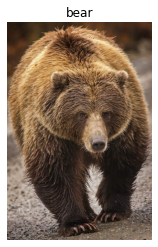

In [13]:
#montrer une photo 
image = plt.imread("/content/drive/MyDrive/animals/animals/bear/039b2ae790.jpg")
plt.imshow(image)
plt.title('bear')
plt.axis('off')
plt.show()


In [15]:
image.shape

(1600, 1061, 3)

In [14]:
#image processing 
def preprocess_image(image, label, image_shape=224):
  img = tf.image.resize(image, [image_shape, image_shape])
  img = img/225
  return tf.cast(img, tf.float32), label

In [ ]:
#maping the data to let data understandable by machines.

In [15]:
train_data = train_data.map(map_func = preprocess_image, num_parallel_calls= tf.data.AUTOTUNE)

#shuffle the data
train_data = train_data.shuffle(buffer_size= 1000).prefetch(buffer_size = tf.data.AUTOTUNE)

#map the preprocess_image to valid data
test_data = test_data.map(map_func = preprocess_image, num_parallel_calls= tf.data.AUTOTUNE)
#shuffle the data
test_data = test_data.shuffle(buffer_size= 1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [16]:
tf.random.set_seed(42)

In [17]:
model_1 = Sequential(
    [
        Conv2D(filters= 32, kernel_size = 4, padding = 'same', activation = 'relu', input_shape = (224, 224, 3)),
        MaxPool2D(2,2),
        Conv2D(filters= 64, kernel_size = 4, padding = 'same', activation = 'relu', input_shape = (224, 224, 3)),
        MaxPool2D(2,2),
        Conv2D(filters= 64, kernel_size = 4, padding = 'same', activation = 'relu', input_shape = (224, 224, 3)),
        MaxPool2D(2,2),
        Dropout(0.5), #reduire l'overfitting lors de l'entrainement du model (desactiver temporairement certains neurones dans le reseau + toutes ses connexions, le choix de ces neurones est aleatoire)
        Flatten(),
        Dense(len(class_names_label_encoder), activation = 'softmax')
     
    ]
)

In [18]:
#compile
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = 'adam',
                metrics=['accuracy'])

#fitting
model_1.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
135/135 [==============================] - 966s 3s/step - loss: 4.4936 - accuracy: 0.0148 - val_loss: 4.4478 - val_accuracy: 0.0176
Epoch 2/10
135/135 [==============================] - 31s 99ms/step - loss: 4.1416 - accuracy: 0.0910 - val_loss: 4.2048 - val_accuracy: 0.0815
Epoch 3/10
135/135 [==============================] - 31s 99ms/step - loss: 2.9834 - accuracy: 0.3211 - val_loss: 4.1461 - val_accuracy: 0.1722
Epoch 4/10
135/135 [==============================] - 31s 98ms/step - loss: 1.8654 - accuracy: 0.5583 - val_loss: 4.9072 - val_accuracy: 0.2398
Epoch 5/10
135/135 [==============================] - 31s 99ms/step - loss: 1.1355 - accuracy: 0.7262 - val_loss: 6.2507 - val_accuracy: 0.2574
Epoch 6/10
135/135 [==============================] - 31s 99ms/step - loss: 0.7635 - accuracy: 0.8116 - val_loss: 8.0380 - val_accuracy: 0.2704
Epoch 7/10
135/135 [==============================] - 31s 100ms/step - loss: 0.5576 - accuracy: 0.8590 - val_loss: 9.4494 - val_accuracy:

In [19]:
model_1.save('my_model.h5')

In [31]:
#transfer learning 
# Download Inception V3 model
base_model_inception = tf.keras.applications.inception_v3.InceptionV3(include_top=False)

# Freeze the layers
base_model_inception.trainable=False

# Inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# Scaling the values
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# Pass inputs to our base_model
x = base_model_inception(inputs,training=False)

# GlobalAveragePooling2D
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# outputs
outputs = tf.keras.layers.Dense(len(class_names_label_encoder), activation='softmax')(x)

# Build model
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

In [32]:
# Fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       validation_data=test_data)

Epoch 1/5
135/135 [==============================] - 42s 146ms/step - loss: 1.4641 - accuracy: 0.6727 - val_loss: 0.7113 - val_accuracy: 0.7981
Epoch 2/5
135/135 [==============================] - 35s 123ms/step - loss: 0.3348 - accuracy: 0.9090 - val_loss: 0.5662 - val_accuracy: 0.8343
Epoch 3/5
135/135 [==============================] - 35s 123ms/step - loss: 0.1698 - accuracy: 0.9613 - val_loss: 0.5324 - val_accuracy: 0.8444
Epoch 4/5
135/135 [==============================] - 35s 125ms/step - loss: 0.0938 - accuracy: 0.9840 - val_loss: 0.4774 - val_accuracy: 0.8546
Epoch 5/5
135/135 [==============================] - 35s 124ms/step - loss: 0.0652 - accuracy: 0.9894 - val_loss: 0.4684 - val_accuracy: 0.8648


In [33]:
model_1.save('model.h5')

In [23]:
#let's make some predictions

In [35]:
import cv2
import numpy as np

img = cv2.imread("/content/drive/MyDrive/animals/animals/monarch-butterfly-grass_4x3.jpg")

img = cv2.resize(img,(224,224))     # resize image to match model's expected sizing
img = img.reshape(1,224,224,3) 
img = img/225
img2 = tf.cast(img, tf.float32),
print(np.argmax(model_1.predict(img2)))

8
